# Life expectancy and GDP

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

- This is done as part of the Codecademy data science path

## Data import and exploration

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The data is explored to find what countries and years are in the data set. The unique function is applied twice to demonstrate the 2 different methods. The rename function is called to make calling the life expecatancy column eeasier in future.

In [2]:
df.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

In [3]:
df.shape
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")

In [4]:
print(df.Country.unique())
print(df['Country'].unique())
print(df.Year.unique())
print(df['Year'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Ploting 
The first plot produced are exporatory plots for GDP and life expectancy, this is to examine there trends more clearly. This distribution is right skewed and is described by a power law distribution.  

<Figure size 576x432 with 0 Axes>

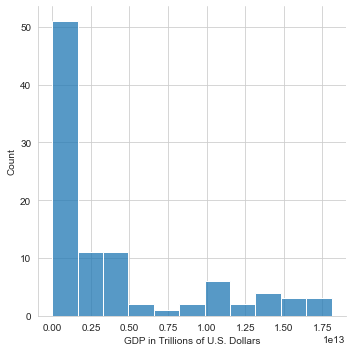

In [5]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.displot(df.GDP)
plt.xlabel("GDP in Trillions of U.S. Dollars");

The oposite happens with the Life expectancy where the graph is left skewed.

<Figure size 576x432 with 0 Axes>

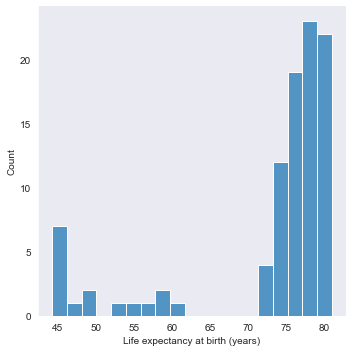

In [6]:
plt.figure(figsize=(8,6))
sns.set_style("dark")
sns.displot(df.LEABY)
plt.xlabel("Life expectancy at birth (years)");

One of these plots is also done with matplotlib to demonstrait how its done.

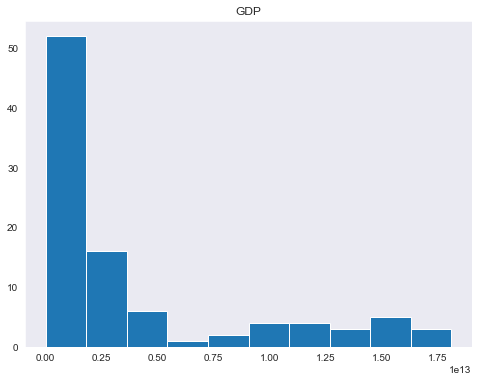

In [7]:
ax=df.hist(column='GDP',figsize=(8,6),grid=False)

None of these plots break up by country, to do this we will find the mean of the life expectancy for each country. To do this the dateframe will need some changes.

In [8]:
dfMeans=df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

The drop function just removes the year as we are not interested in the it anymore for this. We then need to group the remaining data by country. We then take the mean so it finds the mean of all the columes by the same coutry. The reset index allows us to plot the country.

In [9]:
dfMeans.head()

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13


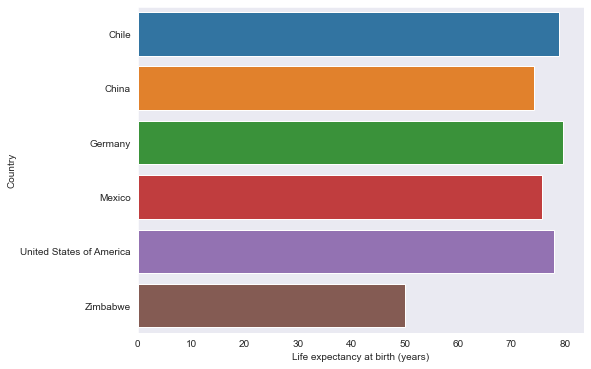

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY", y="Country", data=dfMeans)
plt.xlabel("Life expectancy at birth (years)");

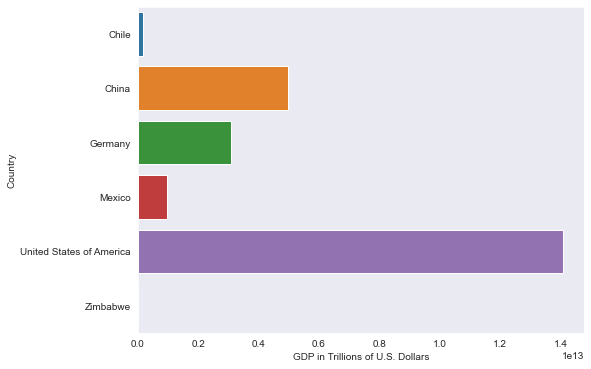

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=dfMeans)
plt.xlabel("GDP in Trillions of U.S. Dollars");

The shows that alot of countries have similar life expectancy, however there is a wide difference in GDP as Zimbabwe you almost cant see.

### Violin Plots 

A violin plot is a useful plot to make as it shows the distribution compared to the box plots. This is because it shows the distribtion of the data as well as all the information from a box plot.         
I will also use plots side by side to show how that is done.

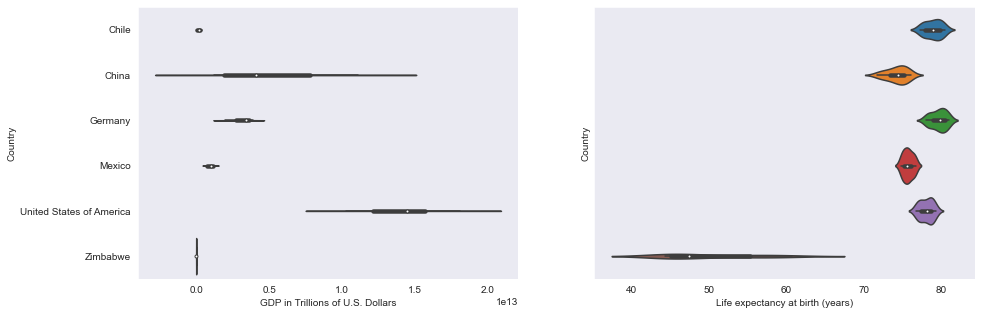

In [13]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax[0] = sns.violinplot(ax=ax[0], x=df.GDP, y=df.Country)
ax[0].set_xlabel("GDP in Trillions of U.S. Dollars")
ax[1] = sns.violinplot(ax=ax[1], x=df.LEABY, y=df.Country)
ax[1].set_xlabel("Life expectancy at birth (years)");

### Swarm Plots
These are a newer type plot that show a single dot for each data point. This can give more useful information as we are able to tell exactly where the data lies e.g. In the GDP plot there are very narrow lines so it is hard to gain alot of information.

C:\Users\Andrew\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


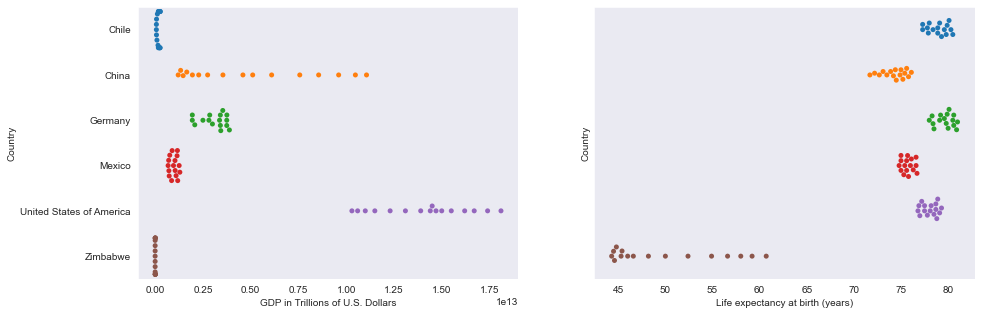

In [15]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax[0] = sns.swarmplot(ax=ax[0], x=df.GDP, y=df.Country)
ax[0].set_xlabel("GDP in Trillions of U.S. Dollars")
ax[1] = sns.swarmplot(ax=ax[1], x=df.LEABY, y=df.Country)
ax[1].set_xlabel("Life expectancy at birth (years)");

### Line Charts 
The most common charts produced and allows us to get alot of information from them.

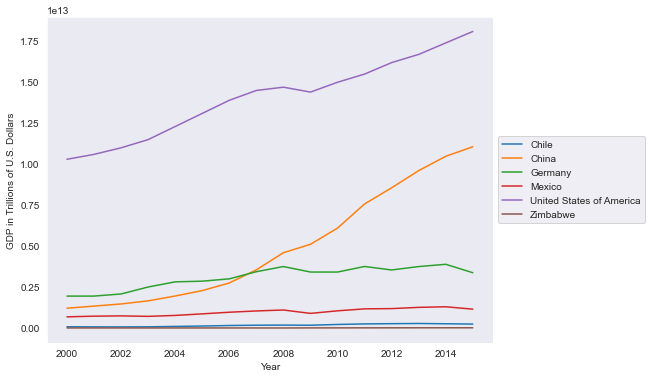

In [18]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

This is a great way of showing information. However US part of the graph dominates and you cant see the trend for the other countries. To be able to dived this further we can make use of the seaborn facetgrid function.

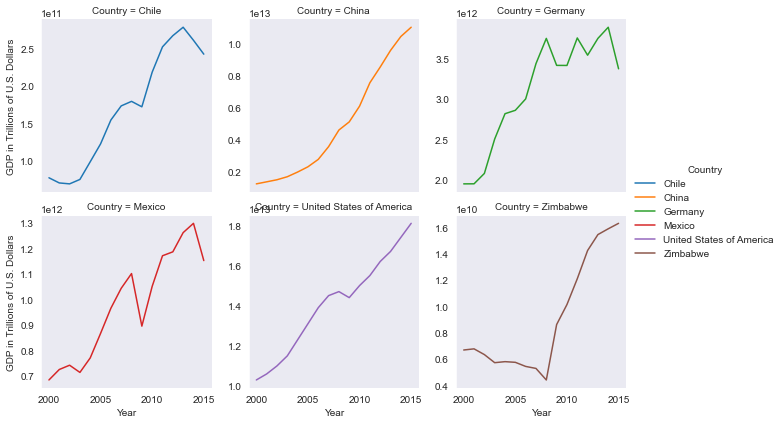

In [21]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,hue = "Country", sharey = False)
graphGDP = graphGDP.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP in Trillions of U.S. Dollars")

The same plots are then produced for the life expectancy

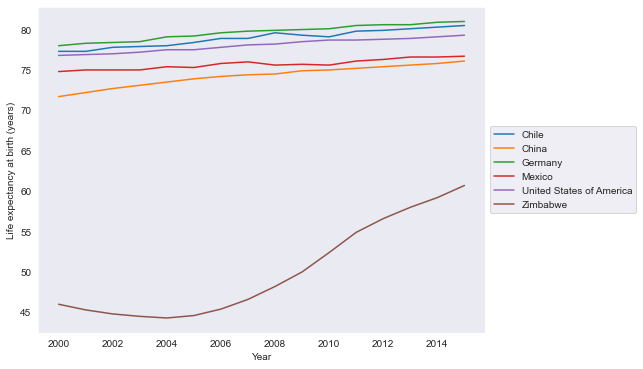

In [22]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");

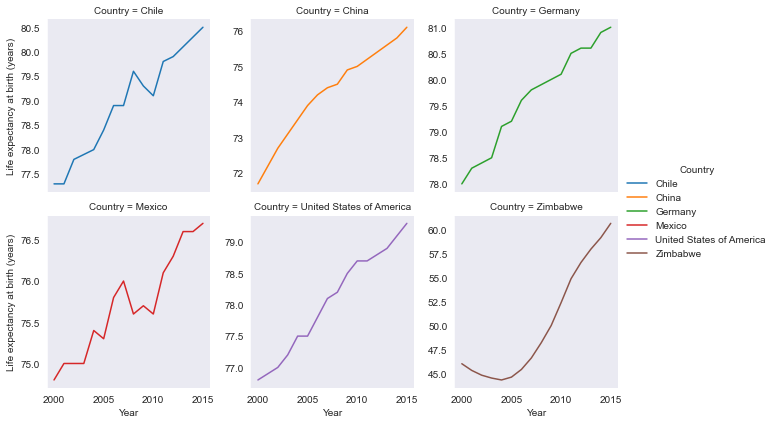

In [25]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False)
graphLEABY = graphLEABY.map(sns.lineplot,"Year","LEABY").add_legend().set_axis_labels("Year","Life expectancy at birth (years)")

## Scatter Plot
To examine the relationship between life expectancy and GDP we will use a scatter plot, this could also be done with a line graph.

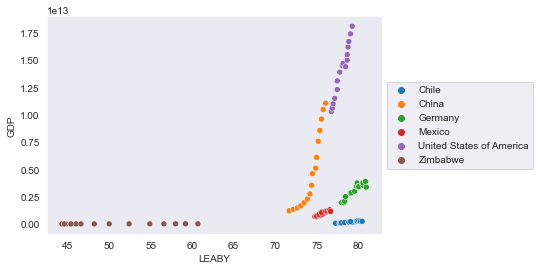

In [27]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

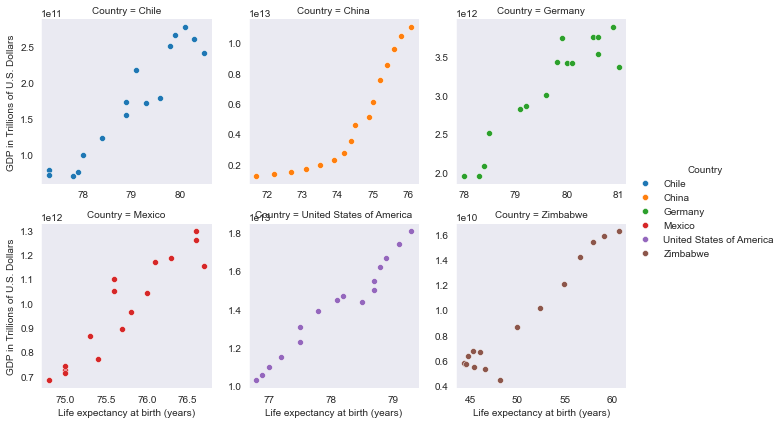

In [28]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

## Conclusions

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.